In [1]:
#Importing necessary library
import pandas as pd


In [2]:
#Loading dataset
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#Checking any missing values exist or not before encoding
(df==0).sum()

fixed acidity            0
volatile acidity         0
citric acid             99
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Id                       1
dtype: int64

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
#Dropping ID as 0 row
df.drop('Id', axis=1, inplace=True)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#Features and Target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
y = y.apply(lambda x: 1 if x>=7 else 0 )

In [10]:
#Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),X.columns),
    ]
)
preprocessor

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [11]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (914, 11)
X_test shape: (229, 11)
y_train shape: (914,)
y_test shape: (229,)


In [12]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [13]:
print(y.value_counts(normalize=True))

quality
0    0.860892
1    0.139108
Name: proportion, dtype: float64


In [14]:
#Training the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


lr = LogisticRegression(C=1.0,solver='liblinear',class_weight='balanced',max_iter=1000,random_state=42)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=5,min_samples_leaf=2,class_weight='balanced',random_state=42)
svc = LinearSVC(C=0.1,class_weight='balanced',max_iter=2000,random_state=42)
rf = RandomForestClassifier(n_estimators=300,max_depth=20,min_samples_split=5,min_samples_leaf=2,class_weight='balanced',random_state=42,n_jobs=-1)

In [15]:
lr.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
dt.fit(X_train_transformed, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [17]:
svc.fit(X_train_transformed, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [18]:
rf.fit(X_train_transformed, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#Making predictions for each model
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
y_pred_svc = svc.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)

In [20]:
#Performance evaluation
from sklearn.metrics import accuracy_score,f1_score,classification_report

def evaluation_score(y_true,y_pred,name= ''):
    print(f"{name} Evaluation...")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"Classification Report: {classification_report(y_true, y_pred,digits=3)}")


In [21]:
#Evaluating Logistic Regression
evaluation_score(y_test,y_pred_lr,"Logistic Regression")

Logistic Regression Evaluation...
Accuracy: 0.80
F1 Score: 0.52
Classification Report:               precision    recall  f1-score   support

           0      0.976     0.796     0.877       201
           1      0.369     0.857     0.516        28

    accuracy                          0.803       229
   macro avg      0.672     0.827     0.696       229
weighted avg      0.901     0.803     0.833       229



In [22]:
#Evaluating Decision Tree
evaluation_score(y_test,y_pred_dt,"Decision Tree")

Decision Tree Evaluation...
Accuracy: 0.86
F1 Score: 0.57
Classification Report:               precision    recall  f1-score   support

           0      0.962     0.876     0.917       201
           1      0.457     0.750     0.568        28

    accuracy                          0.860       229
   macro avg      0.709     0.813     0.742       229
weighted avg      0.900     0.860     0.874       229



In [23]:
#Evaluating LinearSVC
evaluation_score(y_test,y_pred_svc,"LinearSVC")

LinearSVC Evaluation...
Accuracy: 0.79
F1 Score: 0.51
Classification Report:               precision    recall  f1-score   support

           0      0.975     0.786     0.871       201
           1      0.358     0.857     0.505        28

    accuracy                          0.795       229
   macro avg      0.667     0.822     0.688       229
weighted avg      0.900     0.795     0.826       229



In [24]:
#Evaluating RANDOMFOREST
evaluation_score(y_test,y_pred_rf,"RandomForestClassifier")

RandomForestClassifier Evaluation...
Accuracy: 0.92
F1 Score: 0.67
Classification Report:               precision    recall  f1-score   support

           0      0.955     0.950     0.953       201
           1      0.655     0.679     0.667        28

    accuracy                          0.917       229
   macro avg      0.805     0.814     0.810       229
weighted avg      0.918     0.917     0.918       229



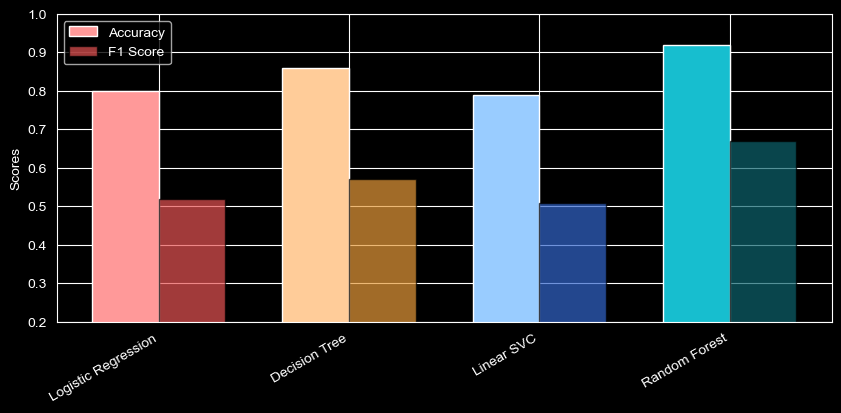

In [31]:
#Model Performance Comparison
import numpy as np
import matplotlib.pyplot as plt

colors_acc ={
    'Logistic Regression':'#ff9999',
    'Decision Tree':'#ffcc99',
    'Linear SVC':'#99ccff',
    'Random Forest':'#17becf'
}

colors_f1 ={
    'Logistic Regression':'#e75454',
    'Decision Tree':'#e69a3a',
    'Linear SVC':'#3366cc',
    'Random Forest':'#0d636d'
}



models =['Logistic Regression','Decision Tree','Linear SVC','Random Forest']

accuracy = [0.80,0.86,0.79,0.92]
f1_score_each =[0.52,0.57,0.51,0.67]
x = np.arange(len(models))

bar_width = 0.35

plt.figure(figsize = (10,4))
plt.bar(x-bar_width/2,accuracy,width = bar_width,label='Accuracy',color=[colors_acc[m] for m in models])
plt.bar(x+bar_width/2,f1_score_each,width=bar_width,label='F1 Score',edgecolor = 'black',alpha = 0.7,color = [colors_f1[m] for m in models])


plt.xticks(x,models,rotation =30,ha='right')
plt.ylabel('Scores')
plt.ylim(0.2,1.0)
plt.legend()
plt.style.use('dark_background')
plt.show()


In [32]:
print("Sample Probabilities(Random Forest): ",rf.predict_proba(X_test_transformed)[:5])

Sample Probabilities(Random Forest):  [[0.91979952 0.08020048]
 [1.         0.        ]
 [0.94136827 0.05863173]
 [0.925771   0.074229  ]
 [0.61394306 0.38605694]]


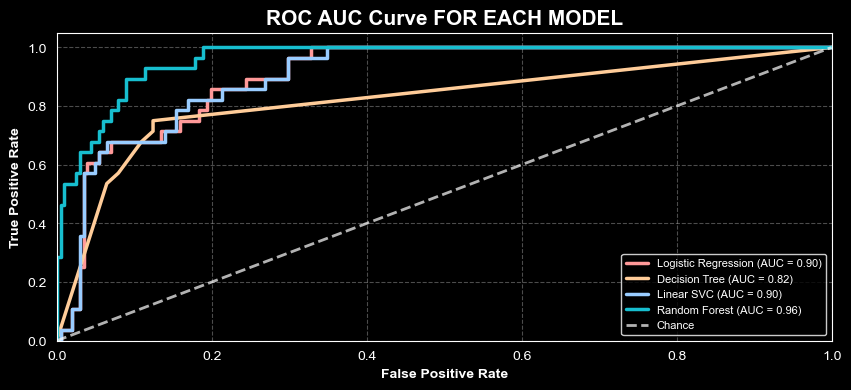

In [34]:
#ROC Curves for all models

from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

models_ = {
    'Logistic Regression':lr,
    'Decision Tree':dt,
    'Linear SVC':svc,
    'Random Forest':rf
}

#Colors for plotting
colors={
    'Logistic Regression':'#ff9999',
    'Decision Tree':'#ffcc99',
    'Linear SVC':'#99ccff',
    'Random Forest':'#17becf'
}

plt.style.use('dark_background')
plt.figure(figsize = (10,4))

for name,model in models_.items():
    try:
        if hasattr(model,'predict_proba'):
            y_score = model.predict_proba(X_test_transformed)[:,1]
        else:
            y_score = model.decision_function(X_test_transformed)

        fpr,tpr,_ = roc_curve(y_test,y_score)
        roc_auc = auc(fpr,tpr)

        plt.plot(fpr, tpr, color=colors[name], lw=2.5,
                 label=f"{name} (AUC = {roc_auc:.2f})")

    except Exception as e:
        print(f"Skipping {name} due to {e}")


#Diagonal line for random classifier
plt.plot([0,1],[0,1],color='white',lw=2,linestyle='--',label='Chance',alpha=0.7)

#Formatting
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=10,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=10,fontweight='bold')
plt.title('ROC AUC Curve FOR EACH MODEL',fontsize=15,fontweight='bold')
plt.legend(loc='lower right',frameon=True,facecolor='black',edgecolor='white',fontsize=8)
plt.grid(alpha=0.3,linestyle='--')

plt.show()

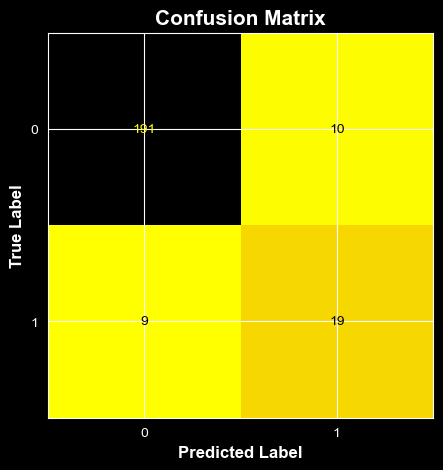

In [43]:
#Confusion matrix for the best model:Random Forest

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

plt.style.use('dark_background')
fig,ax =plt.subplots(figsize=(6,5))
disp.plot(cmap ='gnuplot_r',values_format='d',ax=ax,colorbar=False)

plt.title('Confusion Matrix',fontsize=15,fontweight='bold')
plt.xlabel('Predicted Label',fontsize=12,fontweight='bold' )
plt.ylabel('True Label',fontsize=12,fontweight='bold')
plt.show()